In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
filename = '/content/drive/MyDrive/CJ 항만 물류 AI 과제/data.xlsx'

In [16]:
data = pd.read_excel(filename)
data.head()

,ONBOARD,VESSEL,POL,NATION,DESTINATION,20`,RATE,EX-RATE,O/FRT KRW,OTR KRW,THC,W/F,D/FEE,합계
0,2014-01-01,NYK PHOENIX 50E52,KRPUS,DNA,ESDNA,1,3260.0,1071.3,3492438,37139,115000,4350,30000,3678927
1,2014-01-01,HANJIN LOS ANGELES 0120E,KRPUS,NYC,USNYC,1,3980.0,1071.7,4252232,69104,115000,4350,30000,4470686
2,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,2720.0,1065.6,2917472,58630,116000,4350,30000,3126452
3,2014-01-02,VIENNA EXPRESS 25E52,KRPUS,CHI,USCHI,1,2780.0,1072.3,2980994,69338,115000,4350,30000,3199682
4,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,3100.0,1065.6,3303360,58280,232000,4350,30000,3627990


In [21]:
data = data.rename({"합계":"Total"}, axis = 'columns')
data

,ONBOARD,VESSEL,POL,NATION,DESTINATION,20`,RATE,EX-RATE,O/FRT KRW,OTR KRW,THC,W/F,D/FEE,Total
0,2014-01-01,NYK PHOENIX 50E52,KRPUS,DNA,ESDNA,1,3260.0,1071.3,3492438,37139,115000,4350,30000,3678927
1,2014-01-01,HANJIN LOS ANGELES 0120E,KRPUS,NYC,USNYC,1,3980.0,1071.7,4252232,69104,115000,4350,30000,4470686
2,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,2720.0,1065.6,2917472,58630,116000,4350,30000,3126452
3,2014-01-02,VIENNA EXPRESS 25E52,KRPUS,CHI,USCHI,1,2780.0,1072.3,2980994,69338,115000,4350,30000,3199682
4,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,3100.0,1065.6,3303360,58280,232000,4350,30000,3627990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15509,2020-09-30,MOL TRADITION 012W,KRPUS,HEL,SEHEL,1,1150.0,1180.9,1358035,45513,130000,4420,50000,1587968
15510,2020-09-30,SONGYUNHE 2038W,KRPUS,TEM,GHTEM,1,1369.0,1175.8,1609670,8086,130000,4420,40000,1792176
15511,2020-09-30,MALIAKOS 2007E,KRPUS,VAN,CAVAN,1,3112.0,1181.7,3677450,78988,135000,4420,40000,3935858
15512,2020-09-30,NORTHERN JAMBOREE 038N,KRPUS,CHI,USCHI,1,3200.0,1171.3,3748160,80278,140000,0,45000,4013438


In [23]:
data.loc[data['POL'].isin(['KRBUS','KRPUP','KRPUS'])]

,ONBOARD,VESSEL,POL,NATION,DESTINATION,20`,RATE,EX-RATE,O/FRT KRW,OTR KRW,THC,W/F,D/FEE,Total
0,2014-01-01,NYK PHOENIX 50E52,KRPUS,DNA,ESDNA,1,3260.0,1071.3,3492438,37139,115000,4350,30000,3678927
1,2014-01-01,HANJIN LOS ANGELES 0120E,KRPUS,NYC,USNYC,1,3980.0,1071.7,4252232,69104,115000,4350,30000,4470686
2,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,2720.0,1065.6,2917472,58630,116000,4350,30000,3126452
3,2014-01-02,VIENNA EXPRESS 25E52,KRPUS,CHI,USCHI,1,2780.0,1072.3,2980994,69338,115000,4350,30000,3199682
4,2014-01-02,HANJIN MARSEILLES 0162E,KRPUS,NYC,USNYC,1,3100.0,1065.6,3303360,58280,232000,4350,30000,3627990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15509,2020-09-30,MOL TRADITION 012W,KRPUS,HEL,SEHEL,1,1150.0,1180.9,1358035,45513,130000,4420,50000,1587968
15510,2020-09-30,SONGYUNHE 2038W,KRPUS,TEM,GHTEM,1,1369.0,1175.8,1609670,8086,130000,4420,40000,1792176
15511,2020-09-30,MALIAKOS 2007E,KRPUS,VAN,CAVAN,1,3112.0,1181.7,3677450,78988,135000,4420,40000,3935858
15512,2020-09-30,NORTHERN JAMBOREE 038N,KRPUS,CHI,USCHI,1,3200.0,1171.3,3748160,80278,140000,0,45000,4013438


In [42]:
data.loc[data['POL'].isin(['KRBUS','KRPUP'])] = 'KRPUS'

In [58]:
data["POL"].value_counts()

KRPUS    14587
KRINC      715
KRKAN      160
KRKWY       33
KRPTK       19
Name: POL, dtype: int64

In [33]:
14587/len(data) * 100

94.0247518370504

In [49]:
data['NA_CODE'] = data['DESTINATION'].apply(lambda x: x[:2])

In [51]:
data['NA_CODE'].value_counts()[:11]

US    9276
HK     754
CA     528
JP     477
CN     473
AU     327
ID     256
GB     253
UY     238
DE     232
MX     225
Name: NA_CODE, dtype: int64

## **MX(멕시코)**

In [68]:
MX = data.loc[(data['POL'] == 'KRPUS') & (data['NA_CODE'] =='MX')]
MX.head()

,ONBOARD,VESSEL,POL,NATION,DESTINATION,20`,RATE,EX-RATE,O/FRT KRW,OTR KRW,THC,W/F,D/FEE,Total,NA_CODE
182,2014-02-25,MOL PRIORITY 0907E,KRPUS,ZLO,MXZLO,1,1300,1086.8,1412840,37604,101000,4350,30000,1585794,MX
199,2014-03-02,IKARIA 1409E,KRPUS,ZLO,MXZLO,1,1300,1084.5,1409850,37535,101000,4350,30000,1582735,MX
358,2014-04-10,MOL PRESTIGE 1002E,KRPUS,ZLO,MXZLO,1,4100,1043.2,4277120,41296,346000,13050,30000,4707466,MX
3096,2016-01-10,SAN FRANCISCO BRIDGE 180E,KRPUS,ZLO,MXZLO,1,650,1208.6,785590,92602,115000,4420,70000,1067612,MX
3375,2016-03-06,ZIM PIRAEUS 57E,KRPUS,ATM,MXATM,1,1950,1222.2,2383290,90554,115000,4420,80000,2673264,MX


In [71]:
MX['POL'].value_counts()

KRPUS    223
Name: POL, dtype: int64

In [75]:
MX['YM'] = data['ONBOARD'].apply(lambda x : x[:7])
MX

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ONBOARD,VESSEL,POL,NATION,DESTINATION,20`,RATE,EX-RATE,O/FRT KRW,OTR KRW,THC,W/F,D/FEE,Total,NA_CODE,YM
182,2014-02-25,MOL PRIORITY 0907E,KRPUS,ZLO,MXZLO,1,1300,1086.8,1412840,37604,101000,4350,30000,1585794,MX,2014-02
199,2014-03-02,IKARIA 1409E,KRPUS,ZLO,MXZLO,1,1300,1084.5,1409850,37535,101000,4350,30000,1582735,MX,2014-03
358,2014-04-10,MOL PRESTIGE 1002E,KRPUS,ZLO,MXZLO,1,4100,1043.2,4277120,41296,346000,13050,30000,4707466,MX,2014-04
3096,2016-01-10,SAN FRANCISCO BRIDGE 180E,KRPUS,ZLO,MXZLO,1,650,1208.6,785590,92602,115000,4420,70000,1067612,MX,2016-01
3375,2016-03-06,ZIM PIRAEUS 57E,KRPUS,ATM,MXATM,1,1950,1222.2,2383290,90554,115000,4420,80000,2673264,MX,2016-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,2020-08-05,MSC VEGA FA030A,KRPUS,ZLO,MXZLO,1,2550,1206.9,3077595,52328,135000,4420,50000,3319343,MX,2020-08
15213,2020-08-12,SEASPAN BELIEF 2031E,KRPUS,MTY,MXMTY,1,2387,1196.5,2856046,86,130000,4420,0,2990552,MX,2020-08
15266,2020-08-17,CAROLINE MAERSK 032S,KRPUS,ZLO,MXZLO,1,1250,1195.1,1493875,45853,140000,0,45000,1724728,MX,2020-08
15363,2020-08-31,CHASTINE MAERSK 033S,KRPUS,ZLO,MXZLO,1,1250,1196.7,1495875,45901,140000,0,45000,1726776,MX,2020-08


In [79]:
MX = MX.groupby('YM').sum()
MX

,20`,RATE,EX-RATE,O/FRT KRW,OTR KRW,THC,W/F,D/FEE,Total
YM,,,,,,,,,
2014-02,1,1300.0,1086.8000,1412840,37604,101000,4350,30000,1585794
2014-03,1,1300.0,1084.5000,1409850,37535,101000,4350,30000,1582735
2014-04,1,4100.0,1043.2000,4277120,41296,346000,13050,30000,4707466
2016-01,1,650.0,1208.6000,785590,92602,115000,4420,70000,1067612
2016-03,1,1950.0,1222.2000,2383290,90554,115000,4420,80000,2673264
2016-07,1,3250.0,1170.5000,3655925,8000,115000,4420,40000,3823345
2016-10,1,1712.0,1156.4000,1979757,42692,116000,4420,35000,2177869
2017-03,1,2412.0,1142.7000,2756192,42281,157000,8840,45000,3009313
2017-10,1,3000.0,1167.7000,3503100,43031,116000,4420,45000,3711551


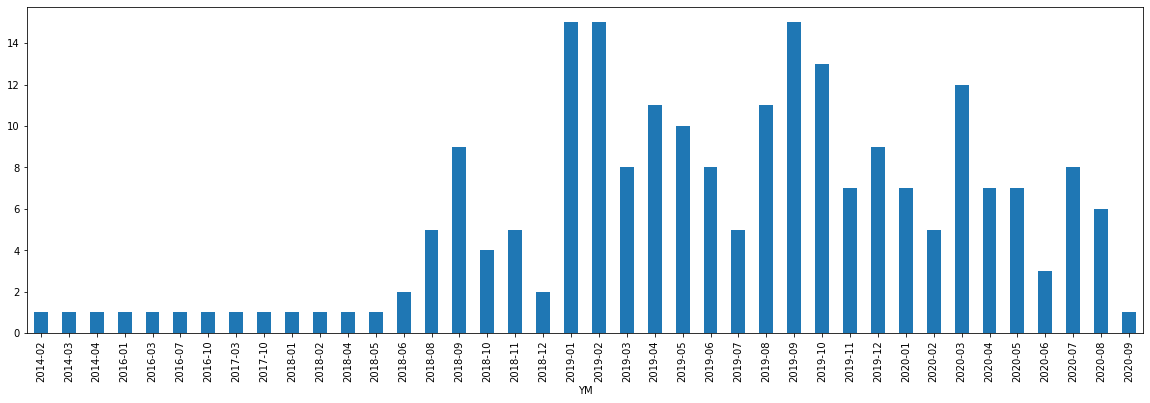

In [87]:
plt.figure(figsize=(20,6))
MX["20`"].plot.bar()